In [ ]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np


Carga y descripción de los datos

¿Cuántas observaciones y variables hay?

¿Qué tipos de datos contiene cada columna?

¿Hay valores nulos o duplicados?

Distribución general

Histograma de edades, sueldos, balances, etc.

¿Cuál es la proporción de clientes que abandonaron el banco (Exited)? (gráfico de torta o barras)

Relaciones entre variables

¿La edad influye en la probabilidad de salir del banco?

¿Influye el saldo o la tenencia (Tenure)?

¿Hay diferencias entre hombres y mujeres?

Análisis por país

¿Qué países tienen más clientes que abandonan?

¿Cuáles retienen mejor a sus clientes?

In [3]:
banco=pd.read_csv('C:/Users/mitlalocelot/BANCO/Churn Modeling.csv')

In [4]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
print(f"Filas: {banco.shape[0]}, Columnas: {banco.shape[1]}")


Filas: 10000, Columnas: 14


In [5]:
print(banco.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [7]:
print(banco.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [9]:
print(banco.duplicated().sum())

0


In [10]:
print(banco['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


In [15]:
print(banco['Exited'].value_counts(normalize=True) * 100)

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


C:\Users\mitlalocelot\AppData\Local\Temp\ipykernel_3388\3844617217.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= banco,x='Exited',palette='Set2')


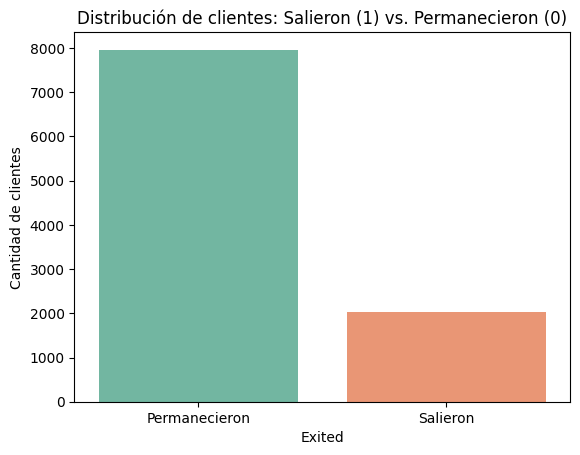

In [23]:
sns.countplot(data= banco,x='Exited',palette='Set2')
plt.title('Distribución de clientes: Salieron (1) vs. Permanecieron (0)')
plt.xlabel('Exited')
plt.ylabel('Cantidad de clientes')
plt.xticks([0, 1], ['Permanecieron', 'Salieron'])
plt.show()

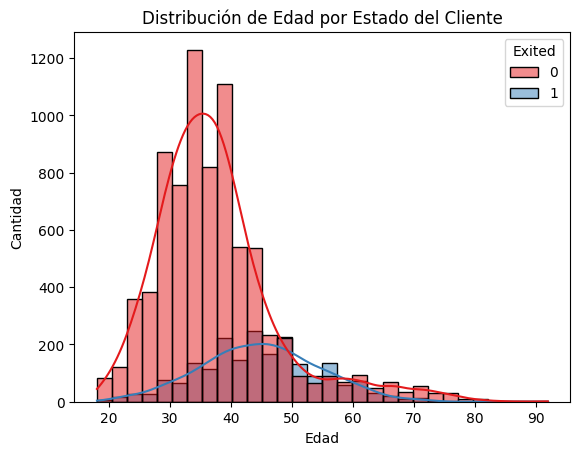

In [26]:
sns.histplot(data=banco, x='Age', hue='Exited', kde=True, bins=30, palette='Set1')
plt.title('Distribución de Edad por Estado del Cliente')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()

C:\Users\mitlalocelot\AppData\Local\Temp\ipykernel_3388\1265994304.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abandono_por_edad = banco.groupby('Age_Group')['Exited'].mean() * 100
C:\Users\mitlalocelot\AppData\Local\Temp\ipykernel_3388\1265994304.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=abandono_por_edad.index, y=abandono_por_edad.values, palette='Set1')


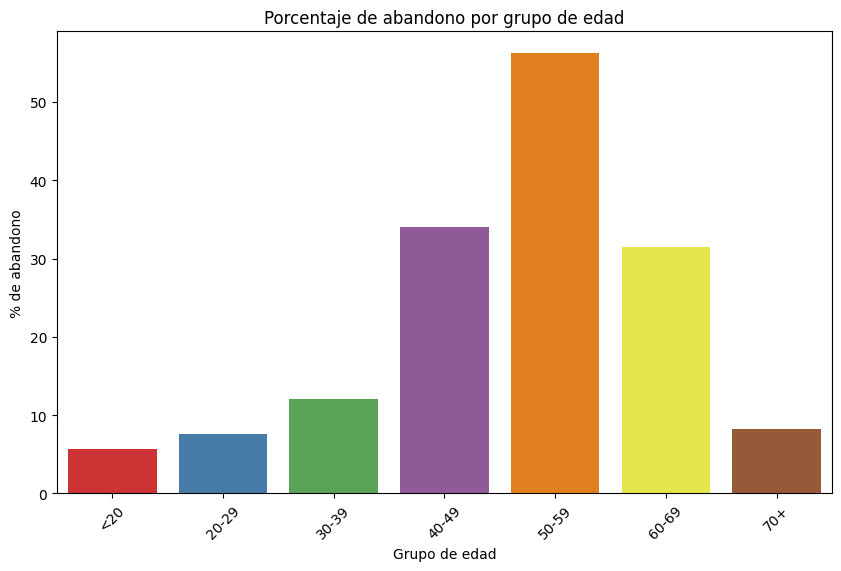

In [29]:
banco['Age_Group'] = pd.cut(banco['Age'], 
                           bins=[0, 20, 30, 40, 50, 60, 70, 100],
                           labels=['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+'])

# Calculamos el porcentaje de abandono por grupo
abandono_por_edad = banco.groupby('Age_Group')['Exited'].mean() * 100

# Creamos el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=abandono_por_edad.index, y=abandono_por_edad.values, palette='Set1')
plt.title('Porcentaje de abandono por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('% de abandono')
plt.xticks(rotation=45)
plt.show()

¿En qué país hay mayor proporción de clientes que abandonan el banco?

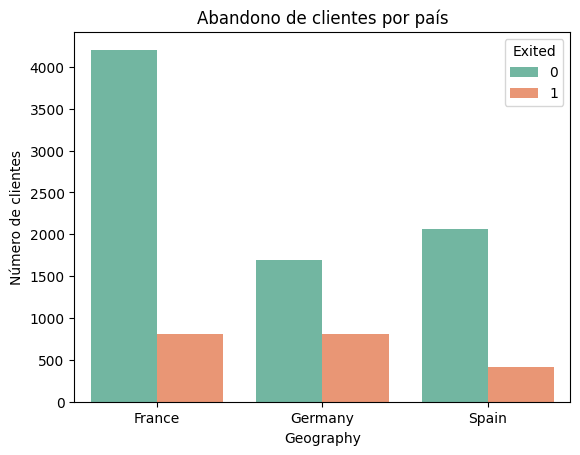

In [30]:
paises_que_abandonan=banco.groupby(['Geography', 'Exited'])['CustomerId'].count().reset_index()

sns.barplot(data=paises_que_abandonan,x='Geography',y='CustomerId',hue='Exited',palette='Set2')
plt.title('Abandono de clientes por país')
plt.ylabel('Número de clientes')
plt.show()

que genero abandona mas 

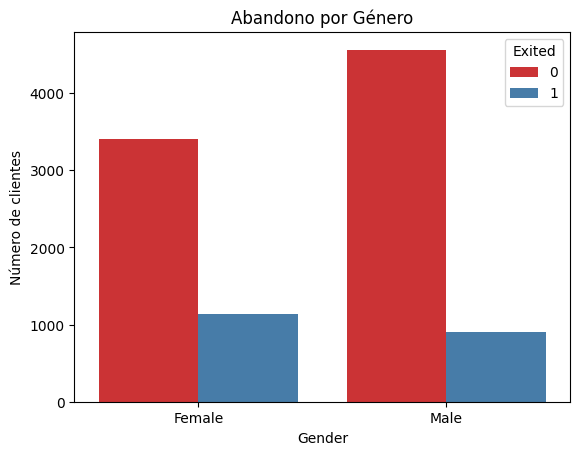

In [31]:
genero_abandono=banco.groupby(['Gender','Exited'])['CustomerId'].count().reset_index()

sns.barplot(data=genero_abandono,x='Gender',y='CustomerId',hue='Exited',palette='Set1')
plt.title('Abandono por Género')
plt.ylabel('Número de clientes')
plt.show()

Visualización  (con seaborn o plotly)
 Objetivo: encontrar patrones claros que expliquen el abandono.

Gráfico de correlación (heatmap)

Muestra las correlaciones entre las variables numéricas y Exited.

Boxplots o violin plots

¿Cómo cambia la distribución de sueldo, edad, balance entre los que se van y los que no?

Gráfico de barras por categoría

¿Influye tener tarjeta de crédito (HasCrCard) o ser miembro activo (IsActiveMember)?

C:\Users\mitlalocelot\AppData\Local\Temp\ipykernel_3388\1318308050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=banco, palette='Set3')


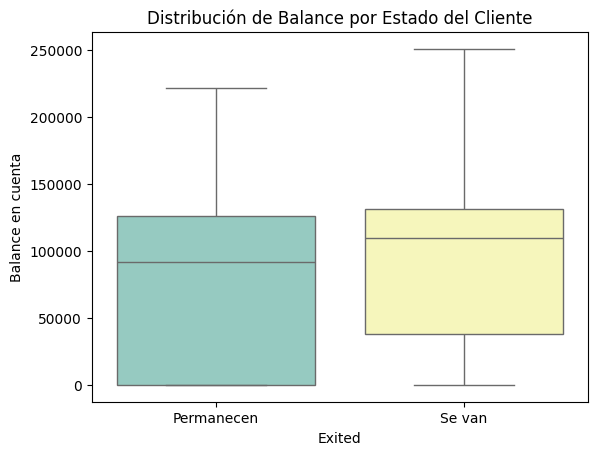

In [32]:

# Boxplot del balance según si se fueron o no

sns.boxplot(x='Exited', y='Balance', data=banco, palette='Set3')
plt.title('Distribución de Balance por Estado del Cliente')
plt.xlabel('Exited')
plt.ylabel('Balance en cuenta')
plt.xticks([0, 1], ['Permanecen', 'Se van'])
plt.show()

Text(0.5, 1.0, 'Matriz de correlación entre variables numéricas')

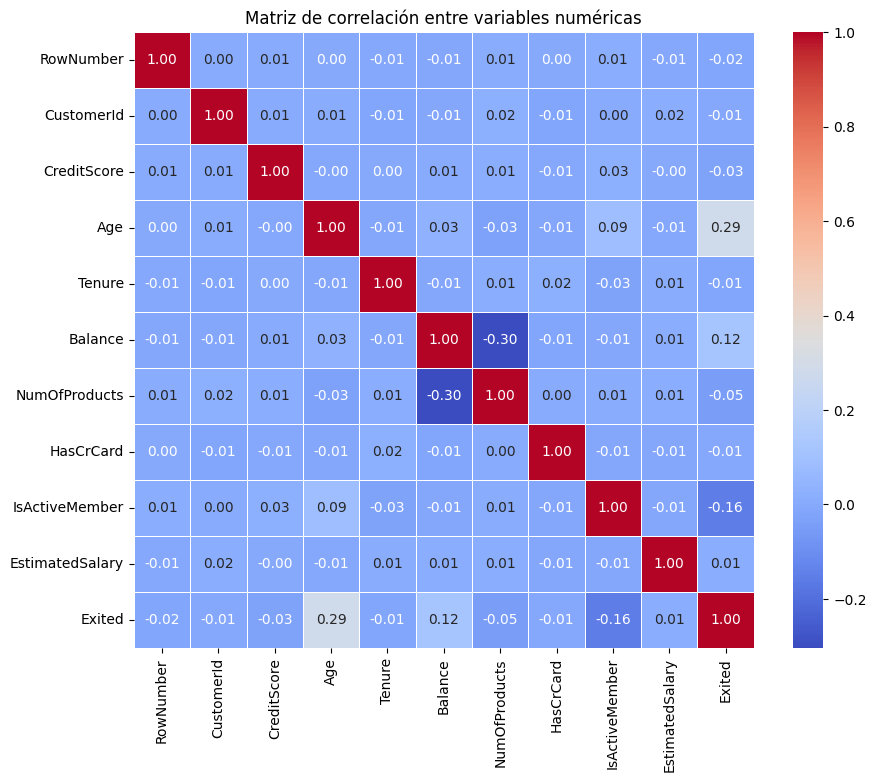

In [33]:
# Seleccionamos solo las columnas numéricas
numericas = banco.select_dtypes(include=['int64', 'float64'])

# Calculamos la matriz de correlación
correlacion = numericas.corr()

# Mapa de calor (heatmap)
plt.figure(figsize=(10,8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")

2. Correlación específica con Exited



In [34]:
# Correlación de cada variable con Exited
correlaciones_con_exited = correlacion['Exited'].sort_values(ascending=False)
print(correlaciones_con_exited)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


Detección de outliers con boxplots
Revisamos algunas columnas para ver si hay valores extremos muy altos o bajos.
Detección de outliers con boxplots
Revisamos algunas columnas para ver si hay valores extremos muy altos o bajos.
Hay valores extremos? ¿Podrías considerar eliminar o normalizar algunas variables para un modelo futuro?

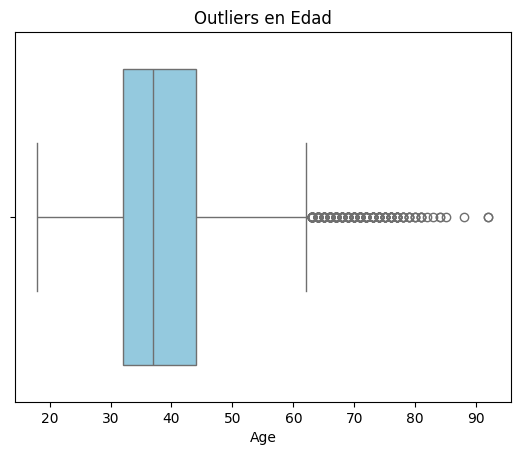

In [36]:
sns.boxplot(x=banco['Age'], color='skyblue')
plt.title("Outliers en Edad")
plt.show()

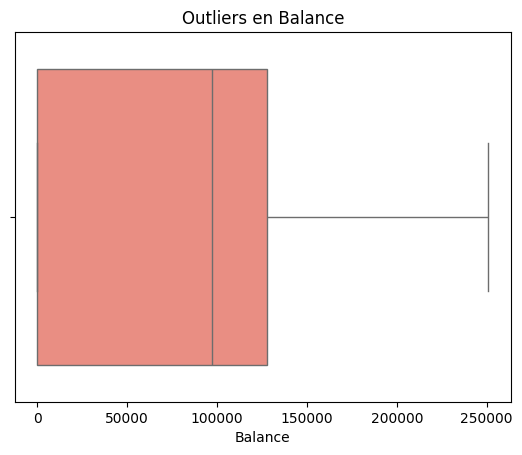

In [37]:
sns.boxplot(x=banco['Balance'], color='salmon')
plt.title("Outliers en Balance")
plt.show()

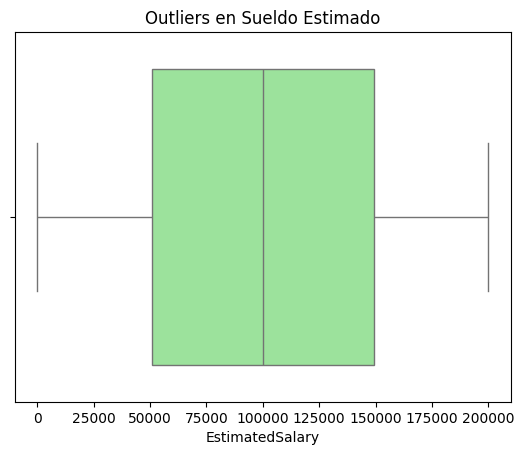

In [38]:
sns.boxplot(x=banco['EstimatedSalary'], color='lightgreen')
plt.title("Outliers en Sueldo Estimado")
plt.show()

La edad media difiere entre los que se van y los que se quedan

Estadística e hipótesis
Objetivo: probar si las diferencias observadas son estadísticamente significativas.

¿Los clientes que se van tienen un sueldo significativamente diferente?

Test de hipótesis: t-test o Mann-Whitney.

¿La edad media difiere entre clientes que se quedan vs. los que se van?

¿Ser mujer u hombre influye en la probabilidad de salida?

Test de proporciones o chi-cuadrado.



In [41]:
grupos_salen=banco[banco['Exited']== 1]['Age']
grupos_quedan=banco[banco['Exited']==0]['Age']

# Prueba t de dos muestras independientes

t_stat, p_valor = stats.ttest_ind(grupos_salen, grupos_quedan)

print(f"t = {t_stat:.2f}")
print(f"p = {p_valor:.4f}")

t = 29.77
p = 0.0000


Edad
t = 29.77, p = 0.0000

Conclusión: Existe una diferencia estadísticamente significativa en la edad entre ambos grupos. Esto indica que la edad es un factor relevante: los clientes que se van tienden a tener una edad distinta (probablemente mayor) que los que se quedan.

In [42]:
sueldo_salen = banco[banco['Exited']== 1]['EstimatedSalary']
sueldo_quedan = banco[banco['Exited'] == 0]['EstimatedSalary']

# Prueba t
t_sueldo, p_sueldo = stats.ttest_ind(sueldo_salen, sueldo_quedan)

print(f"t = {t_sueldo:.2f}")
print(f"p = {p_sueldo:.4f}")

t = 1.21
p = 0.2264


 Sueldo estimado (EstimatedSalary)
t = 1.21, p = 0.2264

 Conclusión: No hay diferencia significativa en el sueldo estimado entre los clientes que se fueron y los que permanecieron. Por lo tanto, el sueldo no parece ser un factor determinante en el abandono del cliente.

In [45]:
tabla_crcard = pd.crosstab(banco['HasCrCard'], banco['Exited'])
chi2, p_crcard, _, _ = stats.chi2_contingency(tabla_crcard)
print("p-valor tarjeta de crédito:", p_crcard)


p-valor tarjeta de crédito: 0.49237236141554697


3. Tarjeta de crédito (HasCrCard)
p = 0.4924

 Conclusión: Tener o no tener tarjeta de crédito no está asociado de forma significativa con la decisión de abandonar el banco

In [43]:
tabla_genero = pd.crosstab(banco['Gender'], banco['Exited'])
chi2, p_genero, _, _ = stats.chi2_contingency(tabla_genero)

print("p-valor por género:", p_genero)

p-valor por género: 2.2482100097131755e-26


Género (Gender)
p = 2.25e-26

 Conclusión: Existe una diferencia estadísticamente significativa por género. Esto sugiere que el género sí influye en la probabilidad de que un cliente abandone el banco, y merece un análisis más profundo (por ejemplo, si hay sesgos o diferencias en servicios ofrecidos).

Variables como la edad y el género **sí tienen relación significativa** con el abandono del cliente.
- Factores como el sueldo o tener tarjeta de crédito **no mostraron relación significativa**.
- Estos hallazgos pueden ser utilizados por el banco para **segmentar mejor sus estrategias de retención**, por ejemplo, enfocarse en clientes mayores o revisar posibles diferencias de atención entre géneros.

"Análisis del abandono de clientes en un banco"